In [1]:
__modified__ = {"2016-04-17":"Fixed week number as calculation done in excel was wrong. Helena populated the tables with correct week numbers"}


In [20]:
import pandas as pd
import os
import numpy as np
import datetime

# Loading data

In [10]:
### Load the digitized values
dirname = "/home/jobel/Dropbox/EuRuCAS/Helena_data"
# NOTE THAT THIS FILE IS NOT LONGER VALID FOR H3. 
filename = "2002-2012_Chla_H3_to_Jose_2015-08-26.xlsx - Sheet1.tsv"
H3 = pd.read_csv(os.path.join(dirname,filename), sep="\t")
# Droping extra column
H3.drop('IDepth', axis=1, inplace=True)
#


dirname = "/home/jobel/Dropbox/EuRuCAS/Helena_data/corrected_data"
filename = "Check_data_B1_H4_H5_HH_Excel_corrected_B1_corr.txt"
B1 = pd.read_csv(os.path.join(dirname,filename), sep="\t")
#
filename = "Check_data_B1_H4_H5_HH_Excel_corrected_H4_corr.txt"
H4 = pd.read_csv(os.path.join(dirname,filename), sep="\t")
#
filename = "Check_data_B1_H4_H5_HH_Excel_corrected_H5_corr.txt"
H5 = pd.read_csv(os.path.join(dirname,filename), sep="\t")
#

B1[B1.year == 2003]
# Concantenating the df and indexing and seleccting all columns but those from index
frames = [B1,H5,H4, H3]
digitized = pd.concat(frames)
# Drop columns, i.e. axis=1
digitized.reset_index(drop=True, inplace=True)
digitized.drop(labels=["Comment","DIN","Date","PO4","month","ratio"], axis=1,inplace=True)
digitized.index = [digitized.station, digitized.year, digitized.week]
digitized.drop(labels=["station","year", "week"],axis=1,inplace=True)
digitized.loc["B1",2003][:5]

/home/jobel/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:30: PerformanceWarning: indexing past lexsort depth may impact performance.


,Chl
week,
4,0.21
8,0.31
11,1.50
13,6.40
14,4.30


In [45]:
# Insitu Source
dirname = "/home/jobel/Dropbox/EuRuCAS/Helena_data"
filename = "CHLA_hose_discr_HH_2016-04-20_HH.csv"

insitu = pd.read_csv(os.path.join(dirname,filename), delimiter="\t", parse_dates=[0],date_parser = lambda x: pd.datetime.strptime(x, '%m/%d/%Y'))
insitu.head()

,SDATE,STATION,Week,IDEPTH,Chl_a_ugl,Comment_txt
0,2003-01-22,B1,4,0-20,0.21,NaN
1,2003-02-18,B1,8,0-20,0.28,NaN
2,2003-03-10,B1,11,0-20,1.47,NaN
3,2003-03-25,B1,13,0-20,6.37,NaN
4,2003-04-01,B1,14,0-20,4.22,NaN


In [46]:
insitu["year"] = insitu['SDATE'].dt.year
insitu.rename(columns = {'STATION':'station', "Week":"week"}, inplace = True)
insitu.head()


,SDATE,station,week,IDEPTH,Chl_a_ugl,Comment_txt,year
0,2003-01-22,B1,4,0-20,0.21,NaN,2003
1,2003-02-18,B1,8,0-20,0.28,NaN,2003
2,2003-03-10,B1,11,0-20,1.47,NaN,2003
3,2003-03-25,B1,13,0-20,6.37,NaN,2003
4,2003-04-01,B1,14,0-20,4.22,NaN,2003


In [47]:
insitu.index = [insitu.station, insitu.year, insitu.week]
#insitu.drop(labels=["station","year", "week"],axis=1,inplace=True)
insitu.loc["B1",2003][:5]


,SDATE,station,week,IDEPTH,Chl_a_ugl,Comment_txt,year
week,,,,,,,
4,2003-01-22,B1,4,0-20,0.21,NaN,2003
8,2003-02-18,B1,8,0-20,0.28,NaN,2003
11,2003-03-10,B1,11,0-20,1.47,NaN,2003
13,2003-03-25,B1,13,0-20,6.37,NaN,2003
14,2003-04-01,B1,14,0-20,4.22,NaN,2003


In [48]:
digitized_dic = digitized.to_dict("index")#"records"
insitu_dic = insitu.to_dict("index")

In [49]:
key_set = set(insitu_dic.keys())
len(key_set)

836

In [50]:
key_set.update(set(digitized_dic.keys()))
len(key_set)

1077

In [51]:
data = {}
for key in key_set:
    data[key]={"Chl_insitu":[],"Chl_digitized":[]}
    try:
        data[key]["Chl_insitu"] = insitu_dic[key]["Chl_a_ugl"]
    except:
        data[key]["Chl_insitu"] = np.nan
    try:
        data[key]["Chl_digitized"] =  digitized_dic[key]["Chl"]        
    except:
        data[key]["Chl_digitized"] = np.nan    


In [52]:
df = pd.DataFrame(data)
df["B1"][2003].T[:5]

,Chl_digitized,Chl_insitu
4,0.21,0.21
8,0.31,0.28
11,1.50,1.47
13,6.40,6.37
14,4.30,4.22


In [53]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

In [54]:
my_dpi = 96
fig = plt.figure(figsize=(1695/my_dpi, 1677/my_dpi), dpi=my_dpi)

In [55]:
colours_experiment={2002:"#5e4fa2",2003:"#3288bd", 2004:"#66c2a5",2005:"#abdda4", 2006:"#e6f598",
                    2007:"lightgrey",2008:"grey",2009:"#fdae61",2010:"#f46d43",2011:"#d53e4f",2012:"#9e0142"} 

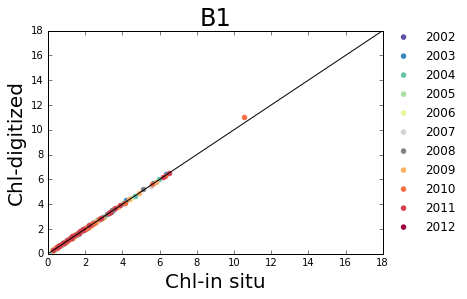

In [78]:
year = 2010
# NOTE THAT H3 DIGITIZED FILE ACTUALLY WAS THE REAL INSITU VALUES. SO USE THOSE INSTEAD OF THE OLD INSITU VALUE FOR H3.
station = "B1"
ax={}
ax[station] = plt.subplot2grid((1,1), (0,0), colspan=1)
x = [0,18]
y = [0,18]
ax[station].plot(x,y,"-",c="black")
year = 2002
ax[station].scatter(df[station][year].T["Chl_insitu"], df[station][year].T["Chl_digitized"], label=year, color = colours_experiment[year])
year = 2003
ax[station].scatter(df[station][year].T["Chl_insitu"], df[station][year].T["Chl_digitized"], label=year, color = colours_experiment[year])
year = 2004
ax[station].scatter(df[station][year].T["Chl_insitu"], df[station][year].T["Chl_digitized"], label=year, color = colours_experiment[year])
year = 2005
ax[station].scatter(df[station][year].T["Chl_insitu"], df[station][year].T["Chl_digitized"], label=year, color = colours_experiment[year])
year = 2006
ax[station].scatter(df[station][year].T["Chl_insitu"], df[station][year].T["Chl_digitized"], label=year, color = colours_experiment[year])
year = 2007
ax[station].scatter(df[station][year].T["Chl_insitu"], df[station][year].T["Chl_digitized"], label=year, color = colours_experiment[year])
year = 2008
ax[station].scatter(df[station][year].T["Chl_insitu"], df[station][year].T["Chl_digitized"], label=year, color = colours_experiment[year])
year = 2009
ax[station].scatter(df[station][year].T["Chl_insitu"], df[station][year].T["Chl_digitized"], label=year, color = colours_experiment[year])
year = 2010
ax[station].scatter(df[station][year].T["Chl_insitu"], df[station][year].T["Chl_digitized"], label=year, color = colours_experiment[year])
year = 2011
ax[station].scatter(df[station][year].T["Chl_insitu"], df[station][year].T["Chl_digitized"], label=year, color = colours_experiment[year])
year = 2012
ax[station].scatter(df[station][year].T["Chl_insitu"], df[station][year].T["Chl_digitized"], label=year, color = colours_experiment[year])

ax[station].set_xlabel('Chl-in situ', fontsize=20)
ax[station].set_ylabel('Chl-digitized', fontsize=20)
ax[station].set_xlim(0,18)
ax[station].set_ylim(0,18)
ax[station].set_title(station, fontsize=24 )
legbp = ax[station].legend(scatterpoints = 1, loc="upper right",bbox_to_anchor=(1.25, 1.05), frameon = False) #
#for text in legbp.get_texts():
#    plt.setp(text, color = 'black', size = 24)



In [74]:
station = "H5"
diff = (df[station][:].T["Chl_digitized"] - df[station][:].T["Chl_insitu"]) / df[station][:].T["Chl_insitu"]

In [75]:
# MNB
"{:.2f}".format(diff.mean()*100)  

'0.68'

In [76]:
# RMS
"{:.2f}".format(diff.std()*100)

'1.89'

In [61]:
os.getcwd()

'/home/jobel/gits/sciencit'

In [62]:
df.to_excel('chl_comparison.xlsx', sheet_name='Sheet1')